In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# (1)heart6.csv 파일을 읽어 heart에 대입
heart = pd.read_csv('heart6.csv')
heart.head()

,Unnamed: 0,Age,Sex,RestBP,Chol,MaxHR,Ca,AHD
0,1,63,1,145,233,150,0.0,No
1,2,67,1,160,286,108,3.0,Yes
2,3,67,1,120,229,129,2.0,Yes
3,4,37,1,130,250,187,0.0,No
4,5,41,0,130,204,172,0.0,No


In [16]:
# (2)heart의 데이터 타입들행레이블, 열레이블 , 크기 확인
print(heart.dtypes)
print(heart.index)
print(heart.columns)
print(heart.shape)

Unnamed: 0      int64
Age             int64
Sex             int64
RestBP          int64
Chol            int64
MaxHR           int64
Ca            float64
AHD            object
dtype: object
RangeIndex(start=0, stop=303, step=1)
Index(['Unnamed: 0', 'Age', 'Sex', 'RestBP', 'Chol', 'MaxHR', 'Ca', 'AHD'], dtype='object')
(303, 8)


In [18]:
# (3)Unnamed: 0 열 삭제 (원본에서 삭제)
heart = heart.drop('Unnamed: 0', axis=1)

In [19]:
# (4)누락된 데이터의 합 확인 후 행삭제
heart.isna().sum()

Age       0
Sex       0
RestBP    0
Chol      0
MaxHR     0
Ca        4
AHD       0
dtype: int64

In [20]:
heart = heart.dropna()
heart.isna().sum()

Age       0
Sex       0
RestBP    0
Chol      0
MaxHR     0
Ca        0
AHD       0
dtype: int64

In [25]:
# (5)sex 변경 (1 = male 0 = female)
heart.loc[heart.Sex == 'male', 'Sex'] = 1
heart.loc[heart.Sex == 'female', 'Sex'] = 0

In [27]:
# (6)통계요약
heart.describe()

,Age,Sex,RestBP,Chol,MaxHR,Ca
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,54.528428,0.675585,131.668896,247.100334,149.505017,0.672241
std,9.020950,0.468941,17.705668,51.914779,22.954927,0.937438
min,29.000000,0.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,133.000000,0.000000
50%,56.000000,1.000000,130.000000,242.000000,153.000000,0.000000
75%,61.000000,1.000000,140.000000,275.500000,165.500000,1.000000
max,77.000000,1.000000,200.000000,564.000000,202.000000,3.000000


In [30]:
# (7)나이 역순으로 정렬
heart.sort_values(by='Age', ascending=False)

,Age,Sex,RestBP,Chol,MaxHR,Ca,AHD
161,77,1,125,304,162,3.0,Yes
257,76,0,140,197,116,0.0,No
233,74,0,120,269,121,1.0,No
42,71,0,160,302,162,2.0,No
103,71,0,110,265,130,1.0,No
...,...,...,...,...,...,...,...
283,35,1,122,192,174,0.0,No
138,35,1,120,198,130,0.0,Yes
225,34,0,118,210,192,0.0,No
101,34,1,118,182,174,0.0,No


<AxesSubplot:xlabel='Age', ylabel='Count'>

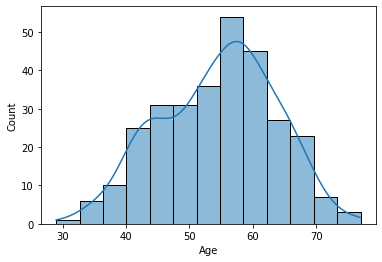

In [97]:
# (8)나이에 대한 히스토그램과 확률밀도 확인
sns.histplot(heart, x = 'Age', kde = True)

<AxesSubplot:xlabel='AHD', ylabel='mean'>

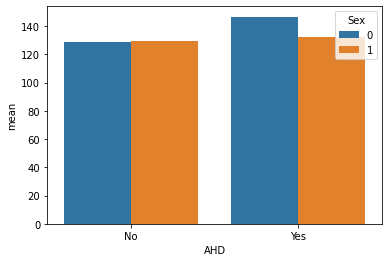

In [59]:
# (9)성별과 AHD에 대한 평균 혈압 테이블을 구성하여 heart2에 저장 , 비교 그래프 그리기
heart2 = heart.groupby(['Sex', 'AHD'])['RestBP'].agg(['mean']).reset_index()

sns.barplot(data = heart2, x = 'AHD', y = 'mean', hue='Sex')

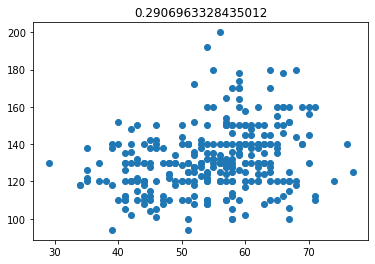

In [67]:
# (10)나이와 혈압과의 관계를 확인하기 위하여 scatter plot을 그리고 제목에 상관계수 출력
plt.scatter(heart.Age, heart.RestBP)
corr = heart[['Age', 'RestBP']].corr(method='pearson')['RestBP'][0]
plt.title(corr)

plt.show()

In [68]:
# (11)AHD 변경, No=0, Yes=1
heart.loc[heart['AHD'] == 'No', 'AHD'] = 0
heart.loc[heart['AHD'] == 'Yes', 'AHD'] = 1

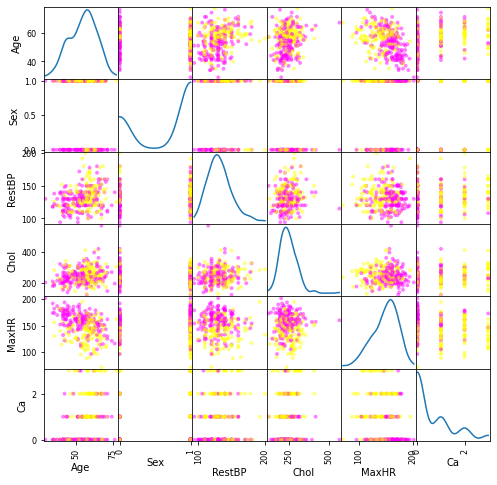

In [101]:
# (12)AHD를 색으로 지정한 scatter_matrix 그리기
pd.plotting.scatter_matrix(heart, s=60, diagonal='kde', c= heart['AHD'], cmap='spring', figsize= (8, 8))
plt.show()

In [93]:
# (13)heart에서 'RestBP', 'Chol' 'MaxHR', 'Ca' 'AHD' 칼럼만 추출 heart3에 저장 (iloc 사용)
heart3 = heart.iloc[:, 2:]
heart3.head()

,RestBP,Chol,MaxHR,Ca,AHD
0,145,233,150,0.0,0
1,160,286,108,3.0,1
2,120,229,129,2.0,1
3,130,250,187,0.0,0
4,130,204,172,0.0,0


In [94]:
# (14)heart3의 상관 계수 확인
corr3 = heart3.corr()
corr3

,RestBP,Chol,MaxHR,Ca
RestBP,1.000000,0.132284,-0.048053,0.098773
Chol,0.132284,1.000000,0.002179,0.119000
MaxHR,-0.048053,0.002179,1.000000,-0.264246
Ca,0.098773,0.119000,-0.264246,1.000000


<AxesSubplot:>

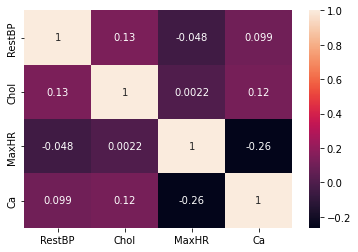

In [95]:
sns.heatmap(corr3, annot=True)

In [96]:
# (15)속성 4개('RestBP', 'Chol', 'MaxHR', 'Ca')는 data로, 심장병 판정결과('AHD')는 target에 저장
data = heart3[['RestBP', 'Chol', 'MaxHR', 'Ca']]
target = heart3[['AHD']]

In [98]:
data.head()

,RestBP,Chol,MaxHR,Ca
0,145,233,150,0.0
1,160,286,108,3.0
2,120,229,129,2.0
3,130,250,187,0.0
4,130,204,172,0.0


In [100]:
target.head()

,AHD
0,0
1,1
2,1
3,0
4,0
